In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk


In [3]:
df = pd.read_csv('Reviews.csv')


In [4]:
print(df.shape)

(568454, 10)


In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
# Dropping the unnecessary columns
df = df.drop(['ProductId','ProfileName','Time','HelpfulnessNumerator','HelpfulnessDenominator',], axis = 1) 


In [7]:
df.head(5)

,Id,UserId,Score,Summary,Text
0,1,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
# Check the number of rows and columns
rows, columns = df.shape
print("No of rows: ", rows) 
print("No of columns: ", columns) 

No of rows:  568454
No of columns:  5


In [10]:
#check data type 
df.dtypes

Id          int64
UserId     object
Score       int64
Summary    object
Text       object
dtype: object

In [11]:
#check for missing values 
df.isnull().sum()

Id          0
UserId      0
Score       0
Summary    27
Text        0
dtype: int64

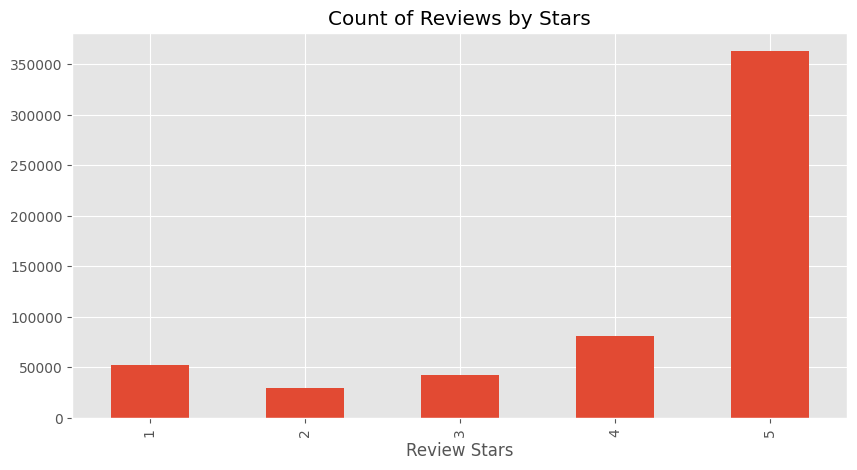

In [12]:
# EDA for Ratings 
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()


In [13]:

nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')         
nltk.download('words')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\himanshu pandey\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\himanshu
[nltk_data]     pandey\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\himanshu
[nltk_data]     pandey\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [14]:
# Basic NLTK 

example = df['Text'][5]

print(example)

I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.


In [15]:

from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [16]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'got', 'a', 'wild', 'hair', 'for', 'taffy', 'and', 'ordered', 'this']

In [17]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('got', 'VBD'),
 ('a', 'DT'),
 ('wild', 'JJ'),
 ('hair', 'NN'),
 ('for', 'IN'),
 ('taffy', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('this', 'DT')]

In [18]:
entities=nltk.chunk.ne_chunk(tagged)
print(entities[:10])

[('I', 'PRP'), ('got', 'VBD'), ('a', 'DT'), ('wild', 'JJ'), ('hair', 'NN'), ('for', 'IN'), ('taffy', 'NN'), ('and', 'CC'), ('ordered', 'VBD'), ('this', 'DT')]


 VADER sentiment scoring 

In [17]:


nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\himanshu
[nltk_data]     pandey\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [20]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [21]:
sia.polarity_scores('You are ugly person')

{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.5106}

In [22]:
sia.polarity_scores(example)

{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

In [23]:
# Run the polarity score on entire dataset 
df.head()

,Id,UserId,Score,Summary,Text
0,1,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...


In [24]:

res = {}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    
    

  0%|          | 0/568454 [00:00<?, ?it/s]

In [25]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index':'Id'})
vaders =  vaders.merge(df, how = 'left')

In [26]:
#Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,UserId,Score,Summary,Text
0,1,0.000,0.695,0.305,0.9441,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...


C:\Users\himanshu pandey\AppData\Local\Temp\ipykernel_488\1176809563.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vaders, x='Score', y='compound', palette=custom_palette)


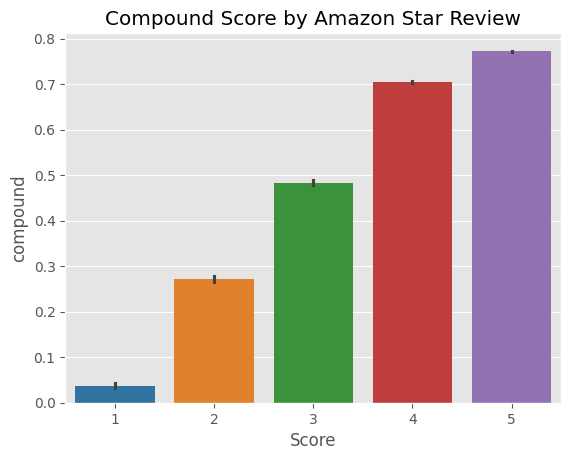

In [26]:
# Define a custom color palette
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create the bar plot
ax = sns.barplot(data=vaders, x='Score', y='compound', palette=custom_palette)
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

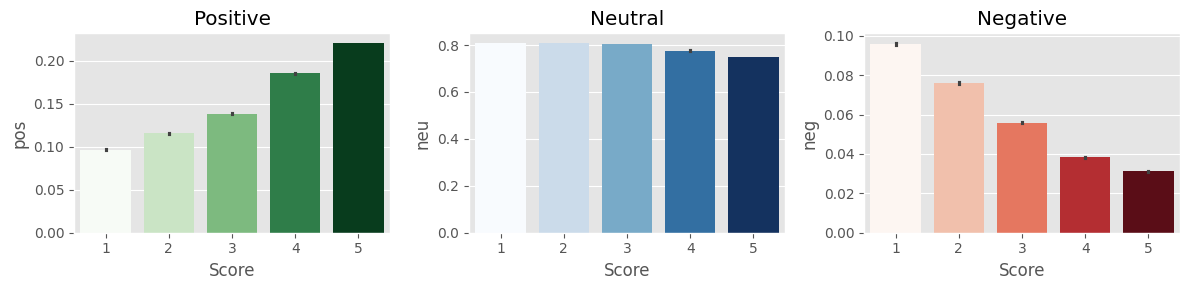

In [27]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Plot positive sentiment
sns.barplot(data=vaders, x='Score', y='pos', hue='Score', palette='Greens', ax=axs[0], legend=False)
axs[0].set_title('Positive')

# Plot neutral sentiment
sns.barplot(data=vaders, x='Score', y='neu', hue='Score', palette='Blues', ax=axs[1], legend=False)
axs[1].set_title('Neutral')

# Plot negative sentiment
sns.barplot(data=vaders, x='Score', y='neg', hue='Score', palette='Reds', ax=axs[2], legend=False)
axs[2].set_title('Negative')

# Adjust layout
plt.tight_layout()
plt.show()

Roberta Pretrained Model 


In [28]:
!pip install transformers torch


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [29]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

C:\Users\himanshu pandey\AppData\Roaming\Python\Python310\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [30]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [31]:
#VADER results on example 
print(example)
sia.polarity_scores(example)


I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.


{'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}

In [32]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0061295875, 'roberta_neu': 0.021795861, 'roberta_pos': 0.97207457}


In [33]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [34]:
df_subset = df.head(500)
res = {}
for i, row in tqdm(df_subset.iterrows(), total=len(df_subset)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [35]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [36]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,UserId,Score,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,A3SGXH7AUHU8GW,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,A1D87F6ZCVE5NK,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,ABXLMWJIXXAIN,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,A395BORC6FGVXV,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,A1UQRSCLF8GW1T,5,Great taffy,Great taffy at a great price. There was a wid...


In [37]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'UserId', 'Score',
       'Summary', 'Text'],
      dtype='object')

Compine and Compare

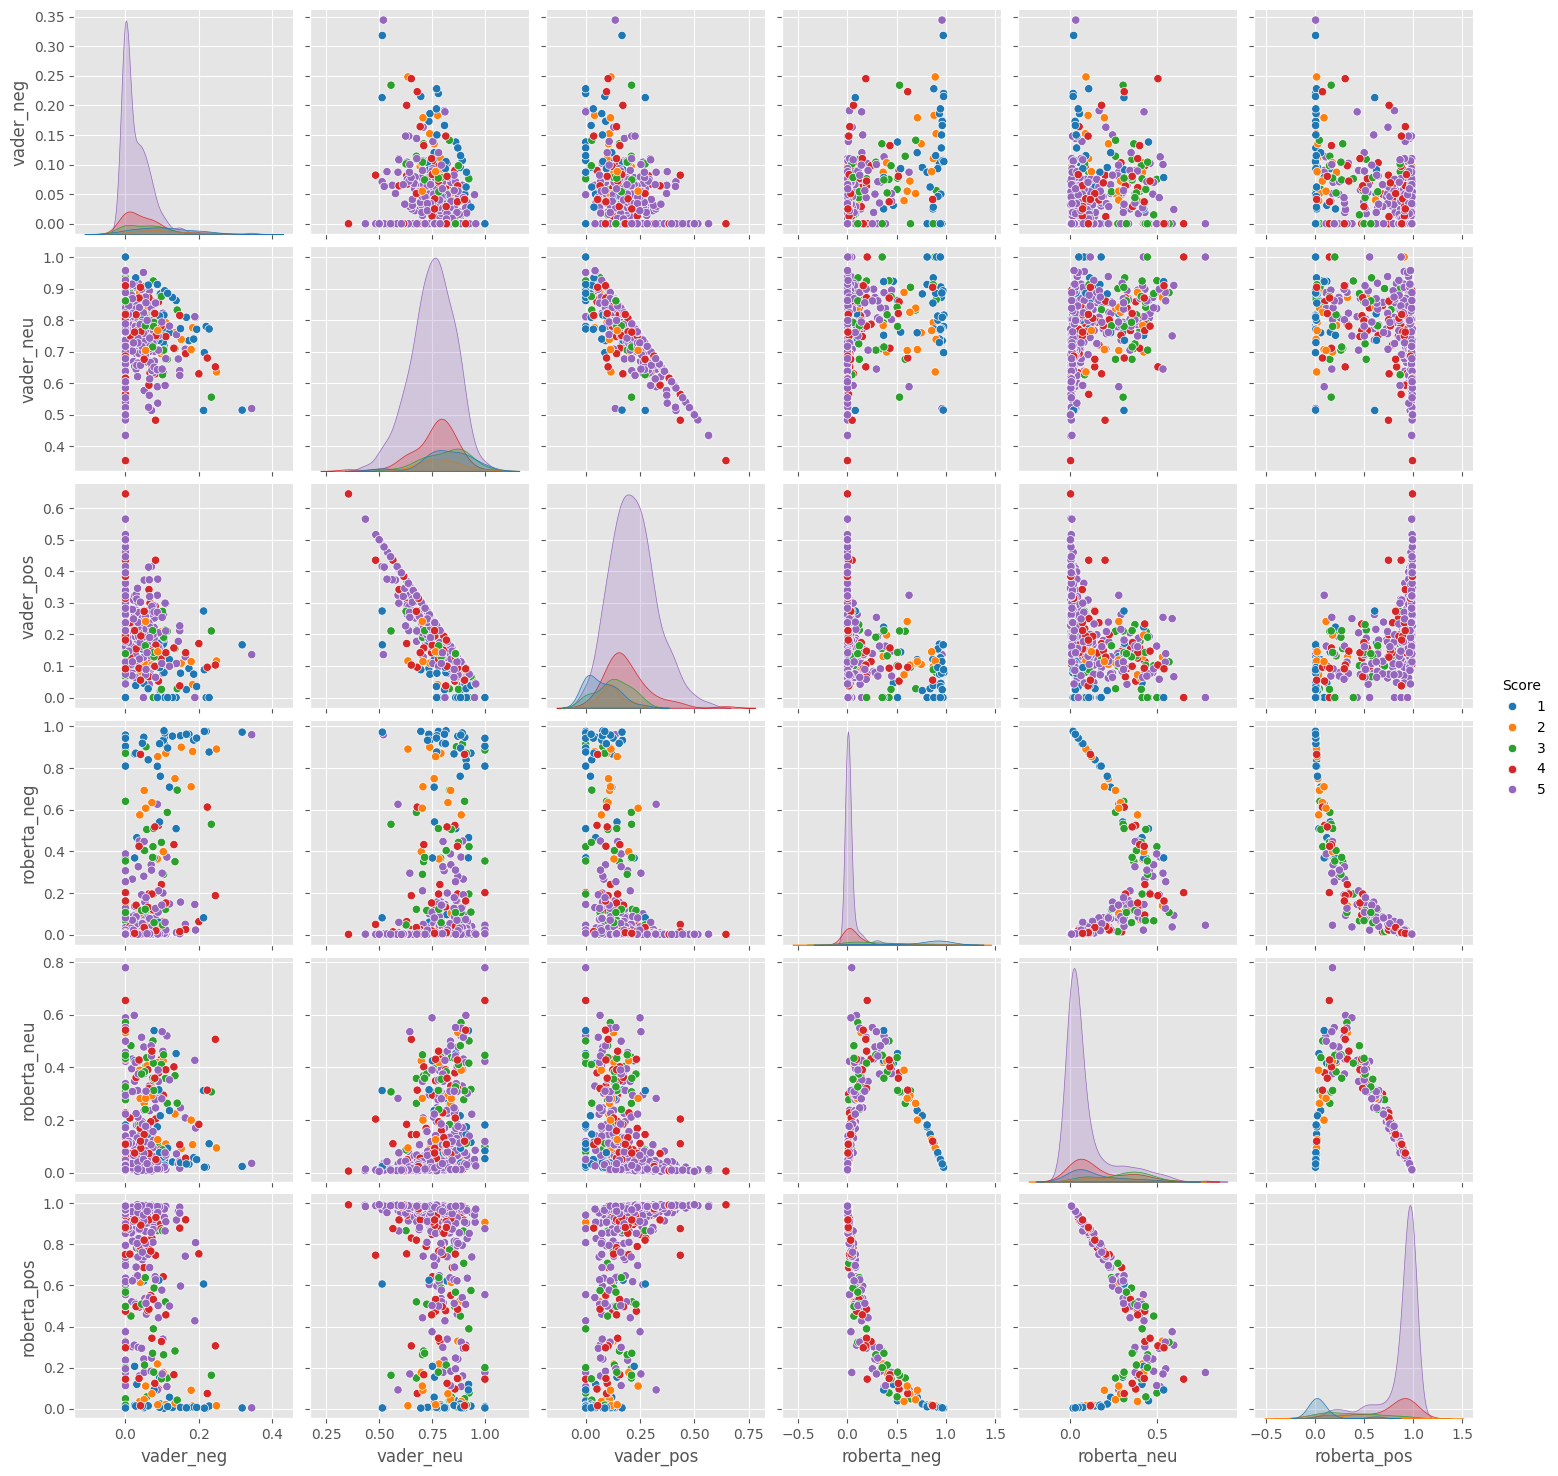

In [38]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

Positive sentiment  1-Star review

In [39]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[1]

"To me, these are nothing like the regular Altoids and are not breath mints. They are pleasant-tasting little candies in a cute convenient tin, and that's as far as it goes. The mintiness is just not strong, and the wintergreens are definitely weaker than the peppermint minis. I'm not a dragon-breath person, but still, one of these mints is too small to have any effect on my breath. Four or five will freshen my breath for a short while - maybe 15 minutes. At this point, I think the Icebreakers Frost mints are the best as sugar free breath mints."

In [40]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[1]

'Seriously this product was as tasteless as they come. There are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. You just have to season it or combine it with something else to share the flavor.'

negative sentiment 5-Star view

In [41]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [42]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]


'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

using svm model 

In [1]:
!pip install scikit-learn pandas numpy matplotlib seaborn nltk

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.
